## Model training and prediction

In [14]:
#calculate mean cross validation score
from sklearn.model_selection import cross_val_score   
rf = RandomForestClassifier(random_state = 42)
cv_score = cross_val_score(rf, data.drop('target',axis = 1), data['target'], cv=5)
print(f'mean cross valdation score - {np.mean(cv_score)}')

mean cross valdation score - 0.880954899812345


In [15]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis =1),data['target'],random_state = 42,stratify = data['target'])
rf = RandomForestClassifier(oob_score=True,random_state = 42)
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_pred = rf.predict(x_test)
acc_train = accuracy_score(y_train,y_train_pred)
acc_test = accuracy_score(y_test,y_pred)
acc_oob = rf.oob_score_
print(f'Accuracy on train data - {acc_train}')
print(f'Accuracy on test data - {acc_test}')
print(f'accuracy on Out-of-bound data - {acc_oob}')

Accuracy on train data - 1.0
Accuracy on test data - 0.9036144578313253
accuracy on Out-of-bound data - 0.9135967849966511


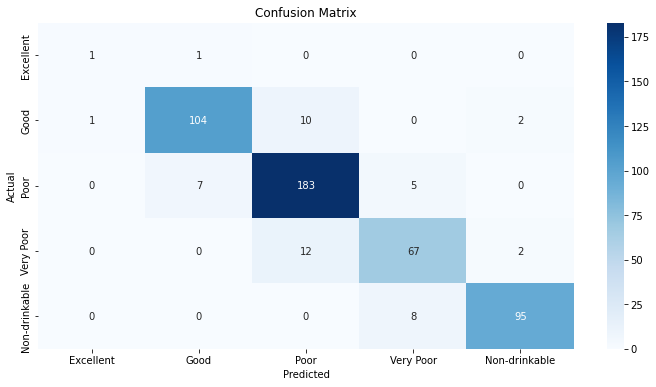

In [16]:
# Confusion metrix of test data
cm = confusion_matrix(y_test,y_pred)
labels = ['Excellent','Good','Poor','Very Poor','Non-drinkable']
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

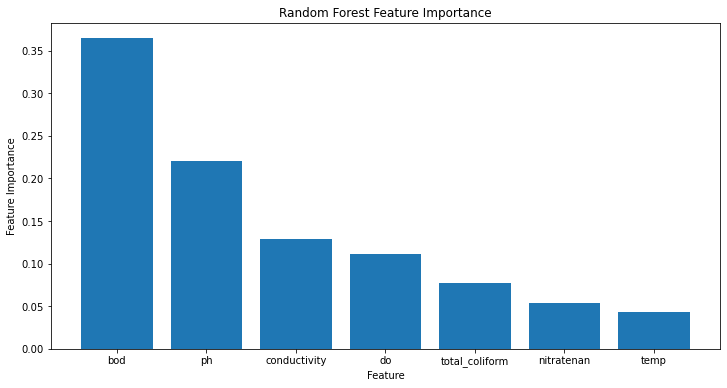

In [20]:
importances = rf.feature_importances_
# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(x_train.shape[1]), sorted_importances)
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

The above graph is a bar graph which shows the  feature importances of a random forest model, providing insights into the relative importance of each feature in the prediction process.We can observe from the graph the B.O.D importance is on top with 0.35 which means if we neglect this feature than it put bad 
impact on the overall accuracy of the model.